In [61]:
#Compensation Equality
#How does salaries vary across demographics (race, age, martial status, departments and sex)?
#Are there any salary discrimination among genders that work in the same dept?

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# import data
data = pd.read_csv("../data/HRDataset.csv")

In [ ]:
data.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [65]:
#Identify null values
Compensation.isnull().sum()

Sex            0
RaceDesc       0
Salary         0
Department     0
MaritalDesc    0
DOB            0
dtype: int64

In [66]:
Compensation = data[["Sex", "RaceDesc", "Salary", "Department", "MaritalDesc", "DOB"]]
print(Compensation)

    Sex RaceDesc  Salary         Department MaritalDesc       DOB
0    M     White   62506  Production             Single  07/10/83
1    M     White  104437              IT/IS     Married  05/05/75
2     F    White   64955  Production            Married  09/19/88
3     F    White   64991  Production            Married  09/27/88
4     F    White   50825  Production           Divorced  09/08/89
..   ..      ...     ...                ...         ...       ...
306  M     White   65893  Production             Single  05/11/85
307   F    Asian   48513  Production             Single  05/04/82
308   F    White  220450              IT/IS      Single  08/30/79
309   F    White   89292              IT/IS      Single  02/24/79
310   F    Asian   45046  Production            Widowed  08/17/78

[311 rows x 6 columns]


In [67]:
mean_salary = Compensation ['Salary'].mean().round(2)

In [68]:
#Evaluate Compensation for each department
#Salary_rd = Compensation.mean(axis=1).round(2)
Compensation.groupby('RaceDesc').agg({'Salary' : ['mean', 'max', 'count', 'sum']})

Salary                        
                                          mean     max count       sum
RaceDesc                                                              
American Indian or Alaska Native  65806.000000   70545     3    197418
Asian                             68521.206897  107226    29   1987115
Black or African American         74431.025000  178000    80   5954482
Hispanic                          83667.000000   83667     1     83667
Two or more races                 59998.181818   71707    11    659980
White                             67287.545455  250000   187  12582771

In [69]:
Compensation.groupby('Sex').agg({'Salary' : ['mean', 'max', 'count', 'sum']})

Salary                        
             mean     max count       sum
Sex                                      
F    67786.727273  250000   176  11930464
M    70629.400000  178000   135   9534969

In [70]:
Compensation.groupby('MaritalDesc').agg({'Salary' : ['mean', 'max', 'count', 'sum']})

Salary                       
                     mean     max count      sum
MaritalDesc                                     
Divorced     64427.333333  148999    30  1932820
Married      69827.717742  250000   124  8658637
Separated    62934.333333   74417    12   755212
Single       70052.576642  220450   137  9597203
Widowed      65195.125000  107226     8   521561

In [71]:
Compensation.groupby('Department').agg({'Salary' : ['mean', 'max', 'count', 'sum']})

Salary                        
                               mean     max count       sum
Department                                                 
Admin Offices          71791.888889  106367     9    646127
Executive Office      250000.000000  250000     1    250000
IT/IS                  97064.640000  220450    50   4853232
Production             59953.545455  170500   209  12530291
Sales                  69061.258065  180000    31   2140899
Software Engineering   94989.454545  108987    11   1044884

In [72]:
salary_summary = data.groupby(['Department','Sex'])['Salary'].agg(['count','mean','median'])
print(salary_summary)

                          count           mean    median
Department           Sex                                
Admin Offices        F        6   70926.333333   59000.0
                     M        3   73523.000000   64520.0
Executive Office     F        1  250000.000000  250000.0
IT/IS                F       22   94593.000000   91718.5
                     M       28   99006.642857   92328.5
Production           F      126   59620.420635   60536.5
                     M       83   60459.253012   58523.0
Sales                F       15   72016.666667   63051.0
                     M       16   66290.562500   67029.5
Software Engineering F        6   96906.166667   97470.0
                     M        5   92689.400000   92989.0


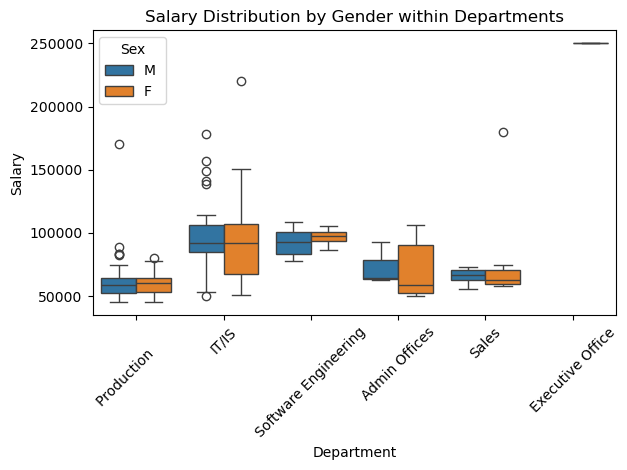

In [73]:
plt.Figure(figsize=(10,6))
sns.boxplot(x='Department', y='Salary', hue='Sex', data=Compensation)
plt.title('Salary Distribution by Gender within Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

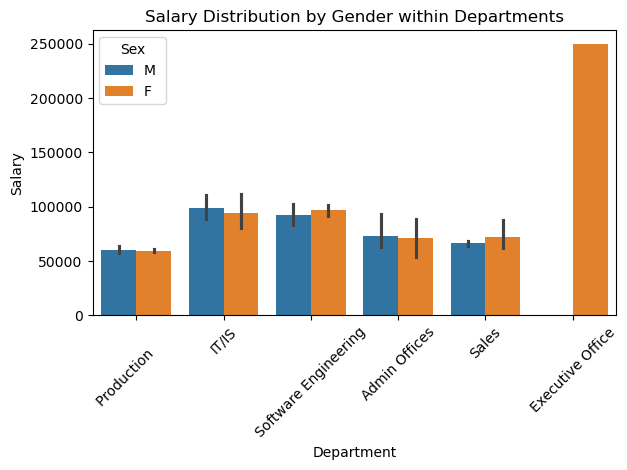

In [74]:
#Bar Plot
avg_salary = data.groupby(['Department', 'Sex'])['Salary'].mean()

plt.Figure(figsize=(10,6))
sns.barplot(x='Department', y='Salary', hue='Sex', data=Compensation)
plt.title('Salary Distribution by Gender within Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

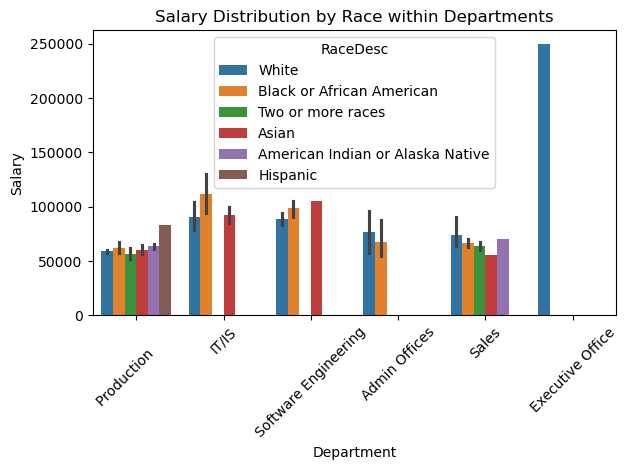

In [75]:
#Bar Plot
avg_salary = data.groupby(['Department', 'RaceDesc'])['Salary'].mean()

plt.Figure(figsize=(10,6))
sns.barplot(x='Department', y='Salary', hue='RaceDesc', data=Compensation)
plt.title('Salary Distribution by Race within Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

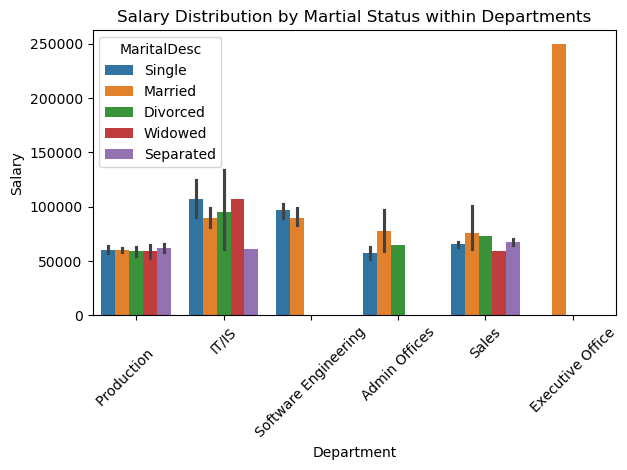

In [76]:
#Bar Plot
avg_salary = data.groupby(['Department', 'MaritalDesc'])['Salary'].mean()

plt.Figure(figsize=(10,6))
sns.barplot(x='Department', y='Salary', hue='MaritalDesc', data=Compensation)
plt.title('Salary Distribution by Martial Status within Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
avg_salary = data.groupby(['Department', 'Sex'])['Salary'].mean()
print(avg_salary)

Department            Sex
Admin Offices         F       70926.333333
                      M       73523.000000
Executive Office      F      250000.000000
IT/IS                 F       94593.000000
                      M       99006.642857
Production            F       59620.420635
                      M       60459.253012
Sales                 F       72016.666667
                      M       66290.562500
Software Engineering  F       96906.166667
                      M       92689.400000
Name: Salary, dtype: float64


In [ ]:
#avg_salary.columns = ['Average_Salary']

In [85]:
avg_salary = data.groupby(['Department', 'Sex']).agg({'Salary' : ['mean']}).round(2)
avg_salary

Salary
                               mean
Department           Sex           
Admin Offices        F     70926.33
                     M     73523.00
Executive Office     F    250000.00
IT/IS                F     94593.00
                     M     99006.64
Production           F     59620.42
                     M     60459.25
Sales                F     72016.67
                     M     66290.56
Software Engineering F     96906.17
                     M     92689.40

In [86]:
avg_salary.columns = ["Salary_mean"]

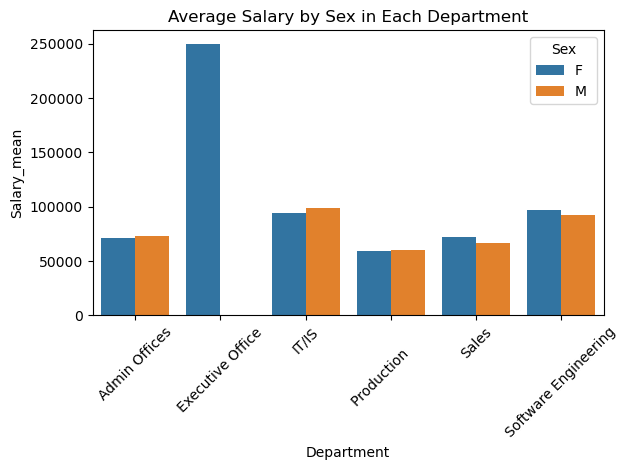

In [87]:
plt.Figure(figsize=(10,6))
sns.barplot(x='Department', y='Salary_mean', hue='Sex', data=avg_salary)
plt.title('Average Salary by Sex in Each Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()